# Image manipulation tests

## Setup

In [22]:
# If not already installed, install these
!python -m pip install Pillow numpy scipy matplotlib

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
# Create RGB888 test image pattern
img = np.array([[[255, 0, 0], [255, 0, 0], [0, 255, 0], [0, 255, 0], [0, 0, 255], [0, 0, 255]],
                [[255, 0, 0], [255, 0, 0], [0, 255, 0], [0, 255, 0], [0, 0, 255], [0, 0, 255]],
                [[255, 255, 0], [255, 255, 0], [0, 255, 255], [0, 255, 255], [255, 0, 255], [255, 0, 255]],
                [[0, 0, 0], [51, 51, 51], [102, 102, 102], [153, 153, 153], [204, 204, 204], [255, 255, 255]],
                [[100, 0, 0], [50, 50, 0], [20, 20, 0], [0, 10, 10], [1, 2, 3], [1, 1, 2]],
                [[50, 50, 0], [100, 0, 0], [0, 10, 10], [20, 20, 0], [1, 1, 2], [1, 2, 3]]], dtype=np.ubyte)

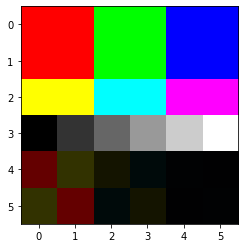

In [25]:
# Show image
plt.imshow(img)

In [26]:
### Print C version (copy output to array in test/unit-tests/main.c for testing)

# Counter to help with formatting
count = 0
total = np.prod(img.shape)

# Print C array
print("{")
for y, row in enumerate(img):
    print(end="    ")
    for pix in row:
        for c in pix:
            if count < total - 1:
                print(f"{c}, ", end="")
            else:
                print(f"{c}", end="")
            count += 1
    print()
print("}")

{
    255, 0, 0, 255, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 255, 0, 0, 255, 
    255, 0, 0, 255, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 255, 0, 0, 255, 
    255, 255, 0, 255, 255, 0, 0, 255, 255, 0, 255, 255, 255, 0, 255, 255, 0, 255, 
    0, 0, 0, 51, 51, 51, 102, 102, 102, 153, 153, 153, 204, 204, 204, 255, 255, 255, 
    100, 0, 0, 50, 50, 0, 20, 20, 0, 0, 10, 10, 1, 2, 3, 1, 1, 2, 
    50, 50, 0, 100, 0, 0, 0, 10, 10, 20, 20, 0, 1, 1, 2, 1, 2, 3
}


## Get/set pixels

In [27]:
### Test: Get pixel value
print(img[5, 5])

[1 2 3]


## Color conversion

## Cropping

## Scaling

In [28]:
### Convert image to Pillow format
pil_img = Image.fromarray(img)
display(pil_img)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  [191  64   0]
  [ 64 191   0]
  [  0 255   0]
  [  0 255   0]
  [  0 191  64]
  [  0  64 191]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [191  64   0]
  [ 64 191   0]
  [  0 255   0]
  [  0 255   0]
  [  0 191  64]
  [  0  64 191]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [191  64   0]
  [ 64 191   0]
  [  0 255   0]
  [  0 255   0]
  [  0 191  64]
  [  0  64 191]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  [191  64   0]
  [ 64 191   0]
  [  0 255   0]
  [  0 255   0]
  [  0 191  64]
  [  0  64 191]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255  76   0]
  [255  76   0]
  [255  76   0]
  [191 121  19]
  [ 64 210  57]
  [  0 255  76]
  [  0 255  76]
  [ 19 191 121]
  [ 57  64 210]
  [ 76   0 255]
  [ 76   0 255]
  [ 76   0 255]]

 [[255 179   0]
  [255 179   0

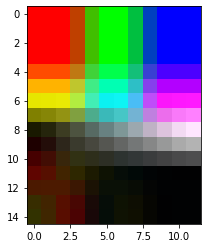

In [29]:
### Scale up with bilinear interpolation

# Do scaling
pil_img_upsampled = pil_img.resize((12, 15), resample=Image.Resampling.BILINEAR)

# View image as Numpy array
img_resized = np.array(pil_img_upsampled)
print(img_resized)
plt.imshow(img_resized)

[[[255   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0 255]
  [  0   0 255]]

 [[255 255   0]
  [255 255   0]
  [  0 255 255]
  [255   0 255]
  [255   0 255]]

 [[  0   0   0]
  [ 51  51  51]
  [153 153 153]
  [204 204 204]
  [255 255 255]]

 [[ 50  50   0]
  [100   0   0]
  [ 20  20   0]
  [  1   1   2]
  [  1   2   3]]]


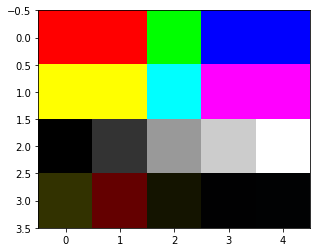

In [30]:
### Scale down with nearest neighbor

# Do scaling
pil_img_downsampled = pil_img.resize((5, 4), resample=Image.Resampling.NEAREST)

# View image as Numpy array
img_resized = np.array(pil_img_downsampled)
print(img_resized)
plt.imshow(img_resized)